# Linear Support Vector Machine with Sub-Gradient Descent Optimization from Scratch

Support vector machine is based on the concept of finding some points in the training dataset that can be used to form an equation that divides the data points into classes.

### Maximal-Margin Classifier
The Maximal-Margin Classifier is a hypothetical classifier that best explains how SVM works in practice. The numeric input variables (x) in your data (the columns) form an n-dimensional space. For example, if you had two input variables, this would form a two-dimensional space. A hyperplane is a line that splits the input variable space. In SVM, a hyperplane is selected to best separate the points in the input variable space by their class, either class 0 or class 1. In two-dimensions you can visualize this as a line.

The distance between the line and the closest data points is referred to as the margin. The best or optimal line that can separate the two classes is the line that as the largest margin. This is called the Maximal-Margin hyperplane. The margin is calculated as the perpendicular distance from the line to only the closest points. Only these points are relevant in defining the line and in the construction of the classifier. These points are called the **support vectors**.

### Soft Margin Classifier
In practice, real data is messy and cannot be separated perfectly with a hyperplane. The constraint of maximizing the margin of the line that separates the classes must be relaxed. This is often called the soft margin classifier. A tuning parameter is introduced called simply **C** that defines the amount of violation of the margin allowed.
* The smaller the value of C, the more sensitive the algorithm is to the training data (higher variance and lower bias).
* The larger the value of C, the less sensitive the algorithm is to the training data (lower variance and higher bias).

### SVM Kernels
* **Linear** : $K(x, x_i) = \sum(x\times x_i)$
* **Polynomial** : $K(x, x_i) = 1+\sum(x\times x_i)^d$
* **Radial** : $K(x, x_i) = e^{-\gamma \sum (x - x_i)^2}$, where $0<\gamma<1$

## Creating Fake Data
An assumption made by the SVM algorithm is that first class value is −1 and the second class value is +1.

In [1]:
from sklearn.datasets import make_classification

In [2]:
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_classes=2, random_state=101)

In [3]:
for i in range(len(y)):
    if y[i] == 0:
        y[i] = -1

In [4]:
print("First 5 X: ")
print(X[:5,:])
print("\nFirst 5 y:")
print(y[:5])

First 5 X: 
[[ 2.34669706  1.99811892]
 [ 2.40710326  2.2038783 ]
 [-0.077088   -1.43258858]
 [ 2.73918283  1.15325581]
 [-0.75506174  0.61430643]]

First 5 y:
[ 1  1 -1  1  1]


In [5]:
import seaborn as sns

In [6]:
sns.set_style('darkgrid')

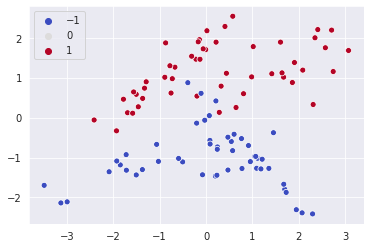

In [7]:
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, palette="coolwarm")

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

## Training SVM with Gradient Descent
### Form of Linear SVM Model
$b0 + (b1 \times X1) + (b2 \times X2) = 0$
### SVM Optimization Method
In Sub-Gradient Descent a random training pattern is selected in each iteration and is used to update the coefficients. After a large number of iterations (thousands or hundreds of thousands) the algorithm will settle on a stable set of coefficients. The coefficient update equation works as follows. First an output value is calculated as:  
  
$output = y \times (b0 + b1\times X1 + b2 \times X2)$  
  
Two different update procedures are used depending on the output value. If the output value is greater than 1 it suggests that the training pattern was not a support vector. This means that the instance was not directly involved in calculating the output, in which case the weights are slightly decreased:  
  
$b = (1-\frac{1}{t})\times b$, where t is the iteration number.  
  
If the output is less than 1 then it is assumed that the training instance is a support vector and must be updated to better explain the data.  
  

$b = (1-\frac{1}{t})\times b + \frac{1}{\lambda \times t}\times (y \times x)$, where $\lambda$ is learning rate

In [10]:
import numpy as np

In [11]:
def update_b(X, y, t, lr):
    output = y*(b[0] + b[1]*X[0] + b[2]*X[1])
    if output < 1:
        for i in range(len(b)):
            x=1
            if(i>0):
                x = X[i-1]
            b[i] = (1-1/t)*b[i] + 1/(lr*t)*y*x
    else:
        for i in range(len(b)):
            b[i] = (1-1/t)*b[i]

## Make Predictions with SVM
With all learned B's:  
  
$output = b0 + b1\times X1 + b2 \times X2$  
$y = -1 \space\space if\space output < 0$  
$y = 1 \space\space if\space output >= 0$

In [12]:
def predict(X):
    p = []
    for x in X:
        output = b[0]+b[1]*x[0]+b[2]*x[1]
        if output < 0:
            p.append(-1)
        else:
            p.append(1)
    return p

In [13]:
from sklearn.metrics import accuracy_score
def fit(X, y, lr, epochs):
    iter_num=1
    acc = []
    for epoch in range(epochs):
        for i in range(len(X)):
            update_b(X[i], y[i], iter_num, lr)
            iter_num += 1
        accuracy = accuracy_score(y_test, predict(X_test))
        acc.append(accuracy)
        print("=> Epoch: %3d, Accuracy: %.3f"%(epoch+1, accuracy))
    return acc

In [14]:
epochs = 40
lr = 0.01
b = np.zeros(3)
accuracy = fit(X_train, y_train, lr, epochs)

=> Epoch:   1, Accuracy: 0.925
=> Epoch:   2, Accuracy: 0.900
=> Epoch:   3, Accuracy: 0.900
=> Epoch:   4, Accuracy: 0.900
=> Epoch:   5, Accuracy: 0.900
=> Epoch:   6, Accuracy: 0.900
=> Epoch:   7, Accuracy: 0.875
=> Epoch:   8, Accuracy: 0.900
=> Epoch:   9, Accuracy: 0.900
=> Epoch:  10, Accuracy: 0.900
=> Epoch:  11, Accuracy: 0.925
=> Epoch:  12, Accuracy: 0.925
=> Epoch:  13, Accuracy: 0.925
=> Epoch:  14, Accuracy: 0.950
=> Epoch:  15, Accuracy: 0.950
=> Epoch:  16, Accuracy: 0.925
=> Epoch:  17, Accuracy: 0.950
=> Epoch:  18, Accuracy: 0.950
=> Epoch:  19, Accuracy: 0.950
=> Epoch:  20, Accuracy: 0.950
=> Epoch:  21, Accuracy: 0.950
=> Epoch:  22, Accuracy: 0.925
=> Epoch:  23, Accuracy: 0.950
=> Epoch:  24, Accuracy: 0.925
=> Epoch:  25, Accuracy: 0.925
=> Epoch:  26, Accuracy: 0.925
=> Epoch:  27, Accuracy: 0.925
=> Epoch:  28, Accuracy: 0.925
=> Epoch:  29, Accuracy: 0.925
=> Epoch:  30, Accuracy: 0.925
=> Epoch:  31, Accuracy: 0.950
=> Epoch:  32, Accuracy: 0.925
=> Epoch

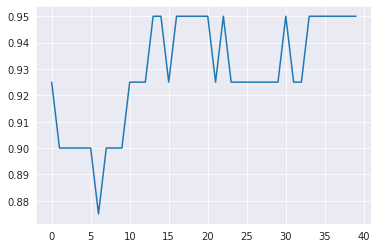

In [15]:
sns.lineplot(x=range(epochs), y=accuracy)

In [21]:
print(b)

[-0.04166667 -0.51027199  1.77860918]


In [16]:
pred = predict(X_test)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[19  1]
 [ 1 19]]
              precision    recall  f1-score   support

          -1       0.95      0.95      0.95        20
           1       0.95      0.95      0.95        20

    accuracy                           0.95        40
   macro avg       0.95      0.95      0.95        40
weighted avg       0.95      0.95      0.95        40



In [19]:
x_line = list(range(-4, 5))
y_line = [-(b[0]+b[1]*x)/b[2] for x in x_line]

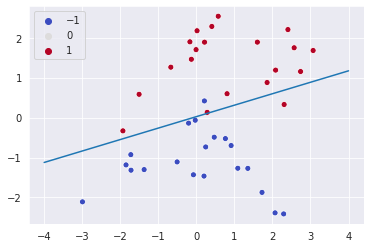

In [20]:
sns.lineplot(x=x_line, y=y_line)
sns.scatterplot(x=X_test[:,0], y=X_test[:,1], hue=y_test, palette="coolwarm")